We will be learning how to analyse simple harmonic motion in this notebook. A link to the sample dataset can be found in the pre-lab slides. Download that file into your computer and then upload the file into your google drive, then access it via colab. Our ultimate goal will be to use Python to fit a sinusoid function to our data, but in order for Python to fit a complicated non-polynomial function, we will need to give our fitting algorithm some rough estimates of what the 2 parameters of A and $\omega$ in

$y(t) = A sin(\omega t) $

Below, we will show how to use Python to figure out the "guess" parameters to feed into the fitter.

We mount our google drive using the code below.

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('drive')

Mounted at drive


Read the file.



In [ ]:
# numpy has a function that helps to read data files so we import it
import numpy as np

# Read in data using np.loadtxt. It takes in two inputs, the path to the file and a delimiter. The delimiter in this case is ','.
# Your data should have five columns - elapsed time, ultrasonic sensor distance, acceleration in x direction, acceleration in y direction, acceleration in z direction
read_in_array = np.loadtxt('copy the path to the dataset here', delimiter=',')

# Obtaining Guess Fit Parameters for Sinusoidal Data

This dataset has five columns - elapsed time, acceleration in x direction, 
acceleration in y direction, acceleration in z direction, ultrasound distance. The units for these columns are ms, cm/s^2, cm/s^2, cm/s^2 and mm respectively.

First, we want to calibrate our data to get it into consistent units and calibrating the accelerometer data such that a motionless Arduino reads an acceleration of 0. 


In [ ]:
# This dataset has five columns
# Take all of the elements in the 0th column to create your x-axis array
x_axis = read_in_array[:,0]
# Elapsed time is typically always going to be the x-axis
# We are converting it from units of ms to s.
elapsed_time = (x_axis-x_axis[0])/1000.

# We will ignore the 2nd, 3rd, and 4th column in this notebook
# For practice, you can work with the 2nd column which was the acceleration of the Simple Harmonic Motion

# We create an array to store the ultrasound data
ultrasound_data_unrefined = read_in_array[:,1]

# Convert from cm to m
ultrasound_data = ultrasound_data_unrefined / 100

# Getting the oscillations centered approximately around 0 - This was done by taking a specific number of cycles and finding the mean.
ultrasound_data = ultrasound_data - np.mean(ultrasound_data[0:920])

Let's plot the ultrasound data.

Text(0, 0.5, 'Distance (m)')

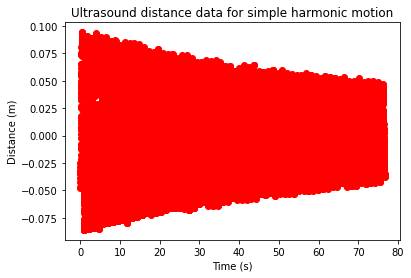

In [ ]:
# Import the module that will help you create a scatter plot
import matplotlib.pyplot as plt

# Make the scatter plot
plt.scatter(elapsed_time,ultrasound_data,color="red")

# Provide a title to the plot
plt.title('Ultrasound distance data for simple harmonic motion')

# Label the x axis
plt.xlabel('Time (s)')

# Label the y axis
plt.ylabel('Distance (m)')

The limits of the plot prevent us from seeing the actual oscillations, so we will index the array, selecting only the first 1000 elements with `array[beginning index:ending index]`.



Text(0, 0.5, 'Distance (m)')

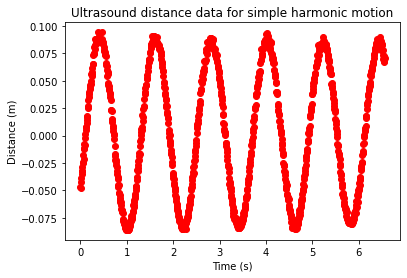

In [ ]:
elapsed_time_window=elapsed_time[0:1000]
ultrasound_data_window = ultrasound_data[0:1000]

# Create a scatter plot
plt.scatter(elapsed_time_window,ultrasound_data_window,color="red")

# Provide a title to the plot
plt.title('Ultrasound distance data for simple harmonic motion')

# Label the x axis
plt.xlabel('Time (s)')

# Label the y axis
plt.ylabel('Distance (m)')

A sinusoid normally has three parameters: A, the amplitude, $\omega$, the frequency and $\phi$ the phase shift from 0. We can make it easier for our fitter to work by selecting a section of data with a phase of 0. We can do this by finding the point where the distance, and therefore phase is equal to 0. 

Text(0, 0.5, 'Distance (m)')

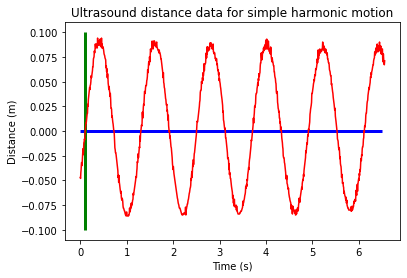

In [ ]:
# Create a scatter plot
plt.plot(elapsed_time_window,ultrasound_data_window,color="red")

# Provide a title to the plot
plt.title('Ultrasound distance data for simple harmonic motion')

# Plot a horizontal line where the distance is 0
plt.hlines([0], 0, 6.5, color = 'blue', linewidth = 3)

# Plot a vertical line where this intersects with our distance
plt.vlines([0.1], -0.1, 0.1, color = 'green', linewidth = 3)

# Label the x axis
plt.xlabel('Time (s)')

# Label the y axis
plt.ylabel('Distance (m)')

From the plot above, it seems like a good place for our data to begin is at 0.1 seconds. However, it is not immediately apparent where we should start indexing our array. We can find the best index to start our array by plotting the array index along the x axis instead of time along the x axis. This can be done by giving only one argument into plt.plot.

Text(0, 0.5, 'Distance (m)')

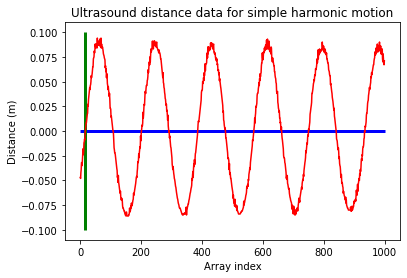

In [ ]:
# Create a scatter plot with index on the x axis
plt.plot(ultrasound_data_window,color="red")

# Provide a title to the plot
plt.title('Ultrasound distance data for simple harmonic motion')

# Plot a horizontal line where the acceleration is 0
plt.hlines([0], 0, 1000, color = 'blue', linewidth = 3)

# Plot a vertical line where this intersects with our acceleration
plt.vlines([16], -0.1, 0.1, color = 'green', linewidth = 3)

# Label the x axis
plt.xlabel('Array index')

# Label the y axis
plt.ylabel('Distance (m)')

From the above, we can see that the data intersects with 0 at an index of 16. So now, we can slice our data by beginning at an index of 16.

Text(0, 0.5, 'Distance (m)')

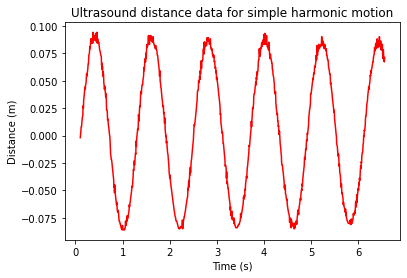

In [ ]:
# Starting the array from the 16th element instead of 0
start_time=16
elapsed_time_window=elapsed_time[start_time:1000]
ultrasound_data_window = ultrasound_data[start_time:1000]

# time_size stores the size of the elapsed_time_window array which will be useful later
time_size=len(elapsed_time_window)

# Create a scatter plot
plt.plot(elapsed_time_window,ultrasound_data_window,color="red")

# Provide a title to the plot
plt.title('Ultrasound distance data for simple harmonic motion')

# Label the x axis
plt.xlabel('Time (s)')

# Label the y axis
plt.ylabel('Distance (m)')

This is the dataset that we will be using for further fits. However, continuing on with finding a guess of the parameters for this curve will be, we can select one cycle. We can use the above code to find the right index for a single cycle. 

Text(0, 0.5, 'Distance (m)')

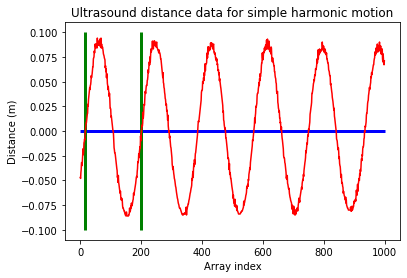

In [ ]:
elapsed_time_window=elapsed_time[0:1000]
ultrasound_data_window = ultrasound_data[0:1000]

# Create a scatter plot with index on the x axis
plt.plot(ultrasound_data_window,color="red")

# Provide a title to the plot
plt.title('Ultrasound distance data for simple harmonic motion')

# Plot a horizontal line where the acceleration is 0
plt.hlines([0], 0, 1000, color = 'blue', linewidth = 3)

# Plot a vertical line where this first intersects with our acceleration line
# Plot a second line where this next intersects with our acceleration line
plt.vlines([16, 200], -0.1, 0.1, color = 'green', linewidth = 3)

# Label the x axis
plt.xlabel('Array index')

# Label the y axis
plt.ylabel('Distance (m)')

Now plotting the the slice of data between the green lines above, we get a single cycle. 

Text(0, 0.5, 'Distance (m)')

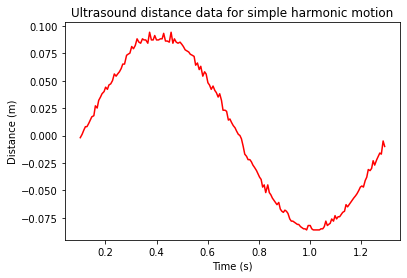

In [ ]:
# Starting the array from the 16th element and end at the 200th element
start_time=16
end_time=200
elapsed_time_window=elapsed_time[start_time:end_time]
ultrasound_data_window = ultrasound_data[start_time:end_time]

# Create a scatter plot
plt.plot(elapsed_time_window,ultrasound_data_window,color="red")

# Provide a title to the plot
plt.title('Ultrasound distance data for simple harmonic motion')

# Label the x axis
plt.xlabel('Time (s)')

# Label the y axis
plt.ylabel('Distance (m)')

Using the array `elapsed_time_window` and `ultrasound_data_window` from above, use Python functions such as `np.max` and `np.min` to find the amplitude A and the frequency in units of 1 / seconds. Put these numbers in your submission.

In [ ]:
# Code to find amplitude


# Clode to find the period


# Compute the frequency from the period


